In [1]:
import os
os.chdir("../../glove/")

In [2]:
import numpy as np
def load_glove_vectors(glove_file):
    with open(glove_file, 'r', encoding="utf-8") as file:
        words = set()
        word_to_vec = {}
        for line in file:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec[curr_word] = np.array(line[1:], dtype=np.float64)
    return words, word_to_vec

In [3]:
words, word_to_vec = load_glove_vectors("glove.6B.100d.txt")

In [4]:
def find_cosine_similarity(u, v):
    cos_angle = 0.0
    dot = np.dot(u,v)
    norm_u = np.sqrt(np.sum(u**2))
    norm_v = np.sqrt(np.sum(v**2))
    cos_angle = dot/(norm_u)/norm_v
    return cos_angle

In [105]:
from heapq import heappush, heapify, heappop
class Node:
    def __init__(self, word, base):
        self.word = word
        self.distance = eucli_distance(word_to_vec[base], word_to_vec[word])
    def __lt__(self, other):
        return self.distance > other.distance

class OriginNode:
    def __init__(self, word):
        self.word = word
        self.distance = distance_from_origin(word_to_vec[word])
    def __lt__(self, other):
        return self.distance < other.distance

def distance_from_origin(u):
    return np.sum(u**2)

def eucli_distance(u,v):
    return np.linalg.norm(u-v)

def closest_words(base, num):
    closest = []
    for word in words:
        if word == base:
            continue
        if len(closest) < num:
            closest.append(Node(word, base))
            continue
        heapify(closest)
        heappop(closest)
        heappush(closest, Node(word,base))
    return [w.word for w in closest]

def words_from_origin(num):
    closest = []
    for word in words:
        if len(closest) < num:
            closest.append(OriginNode(word))
            continue
        heapify(closest)
        heappop(closest)
        heappush(closest, OriginNode(word))
    return [w.word for w in closest]
    

In [106]:
words_from_origin(30)

['kiddle',
 '9a-4p',
 'eighteens',
 '#e',
 'resend',
 'hushen',
 'passeriformes',
 'fachhochschule',
 'nytimes',
 'passerine',
 '20003',
 'nikkei-225',
 '404-526-5456',
 '30-share',
 '225-issue',
 '100-share',
 'coxnet',
 '212-556-4204',
 'non-families',
 'householder',
 'tael',
 'republish',
 'non-mandatory',
 'daybook',
 'stoxx',
 'hah',
 'gmina',
 'herein',
 'taiex',
 'nonsubscribers']

In [104]:
distance_from_origin(word_to_vec["kiddle"])

6.621430723038133

In [6]:
def find_analogy(a,b,c):
    A = word_to_vec[a]
    B = word_to_vec[b]
    C = word_to_vec[c]
    best_word = ""
    max_sim = float("-inf")
    for word in words:
        if word in [a,b,c]:
            continue
        curr_sim = find_cosine_similarity(A-B, C- word_to_vec[word])
        if curr_sim > max_sim:
            max_sim = curr_sim
            best_word = word
    return best_word

In [14]:
find_analogy("light","lighter","greedy")

'heftier'

In [25]:
king = closest_words("king",100)

In [26]:
queen = closest_words("queen",100)

In [28]:
man = closest_words("man",100)
woman = closest_words("woman",100)


In [86]:
p2 = [x for x in man if x in woman]
p1 =  [x for x in king if x in queen]
[x for x in p1 if x in p2]

['kiddle', 'named', 'father']

In [29]:
cat = closest_words("cat",100)
dog = closest_words("dog",100)
puppy = closest_words("puppy",100)
kitten = closest_words("kitten",100)

In [35]:
p1 = [x for x in cat if x in kitten]
p2 = [x for x in dog if x in puppy]
[x for x in p1 if x in p2]

['kiddle', 'pooch', 'rottweiler', 'pug', 'puppies']

In [36]:
nucleus = closest_words("nucleus",100)
electron = closest_words("electron",100)
sun = closest_words("sun",100)
planet = closest_words("planet",100)

In [61]:
p1 = [x for x in electron if x in nucleus]
p2 = [x for x in sun if x in planet]
[x for x in p1 if x in p2]

['kiddle']

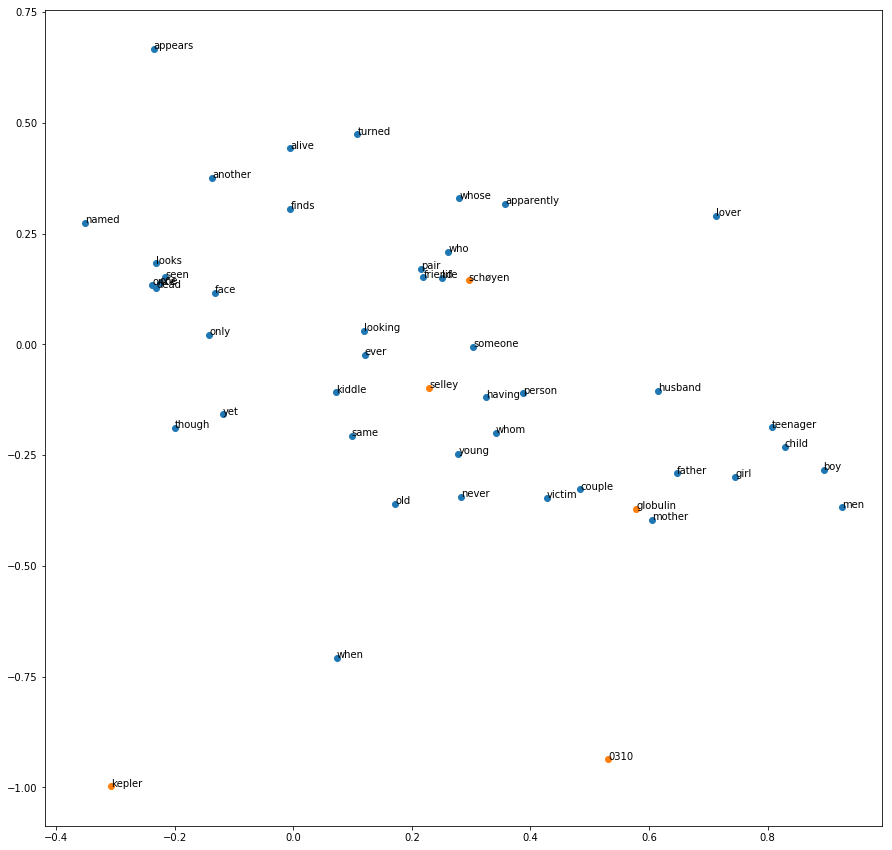

In [88]:
tmp = list(words)
noise = 5
noise_x = [word_to_vec[tmp[i]][0] for i in range(noise)]
noise_y = [word_to_vec[tmp[i]][4] for i in range(noise)]
noise_w = tmp[:noise]
lst_words = p2 
num = len(lst_words)
X = [word_to_vec[lst_words[i]][0] for i in range(num)] 
y = [word_to_vec[lst_words[i]][4] for i in range(num)] 
w = lst_words[:num] 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(X, y)
for i, txt in enumerate(w):
    ax.annotate(txt, (X[i], y[i]))
ax.scatter(noise_x, noise_y)
for i, txt in enumerate(noise_w):
    ax.annotate(txt, (noise_x[i], noise_y[i]))